<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_4%EC%A3%BC%EC%B0%A8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기계학습론 4주차 실습

## 라이브러리 불러오기

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:

df = pd.read_csv('boston.csv')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [100]:
df.shape

(506, 14)

## EDA

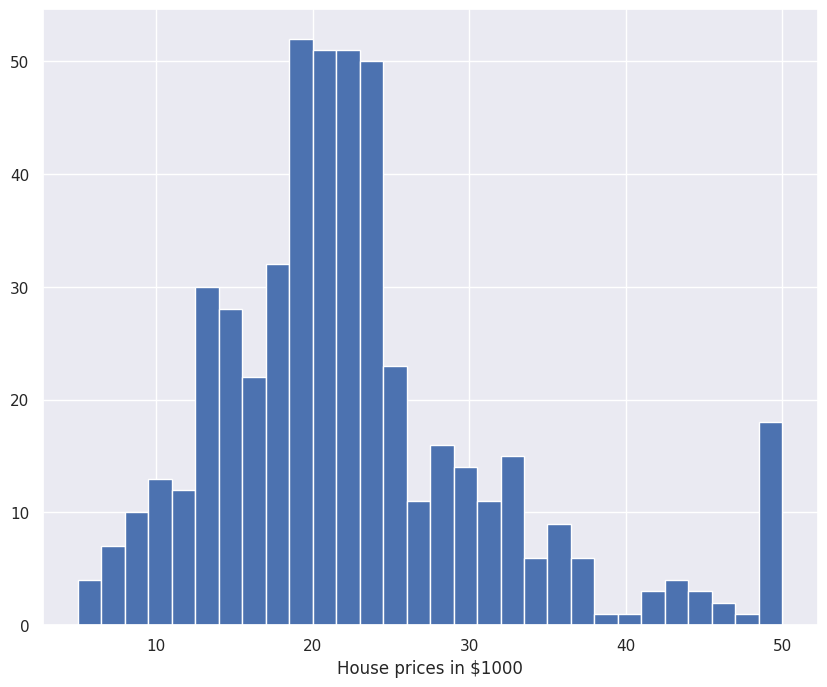

In [101]:
sns.set(rc={'figure.figsize':(10,8)})
plt.hist(df['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<Axes: >

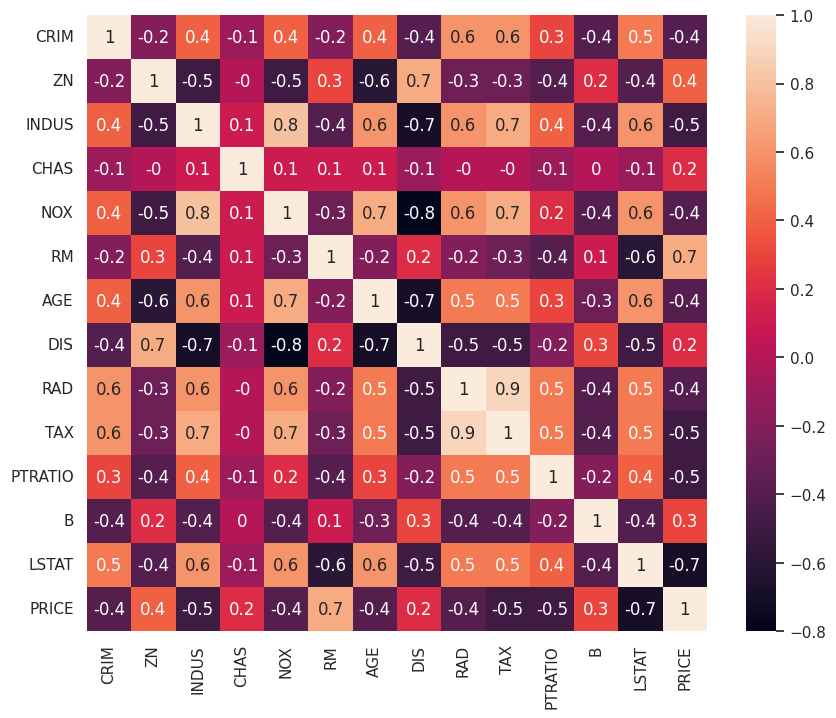

In [102]:
correlation_matrix = df.corr().round(1)
sns.heatmap(data=correlation_matrix,annot=True)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

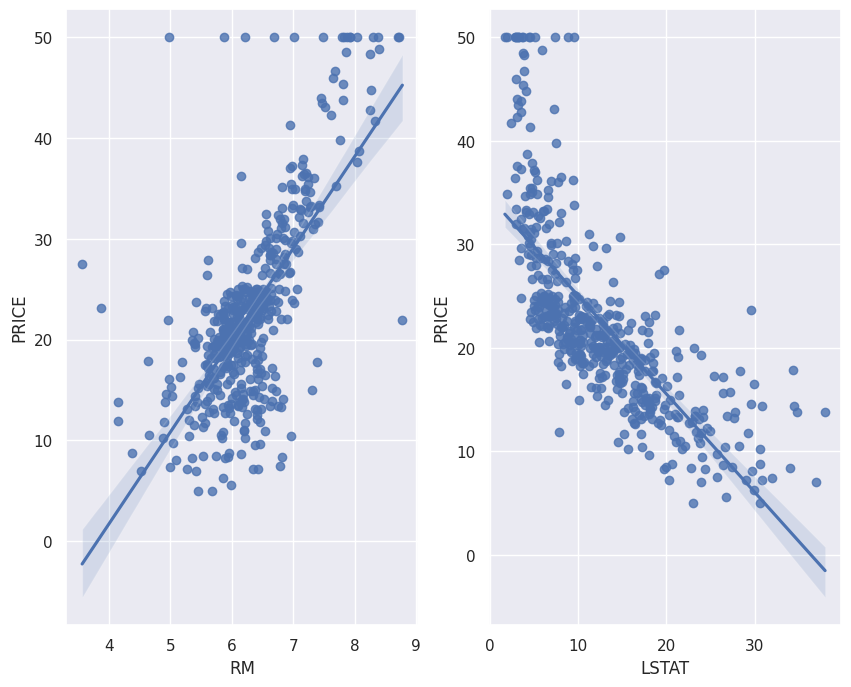

In [103]:
sns.set_style('darkgrid')
fig,axs =plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=df, ax=axs[0])
sns.regplot(x='LSTAT', y='PRICE', data=df, ax=axs[1])

## 데이터셋 분리 & 모델 학습

In [104]:
X = df[['RM']].values
y = df['PRICE'].values

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,
                                                 random_state = 13)

In [106]:
X_train.shape, X_test.shape

((404, 1), (102, 1))

In [107]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)


LinearRegression()

In [108]:
y_pred_t = slr.predict(X_train)
y_pred = slr.predict(X_test)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 8.947
절편: -33.559


In [109]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

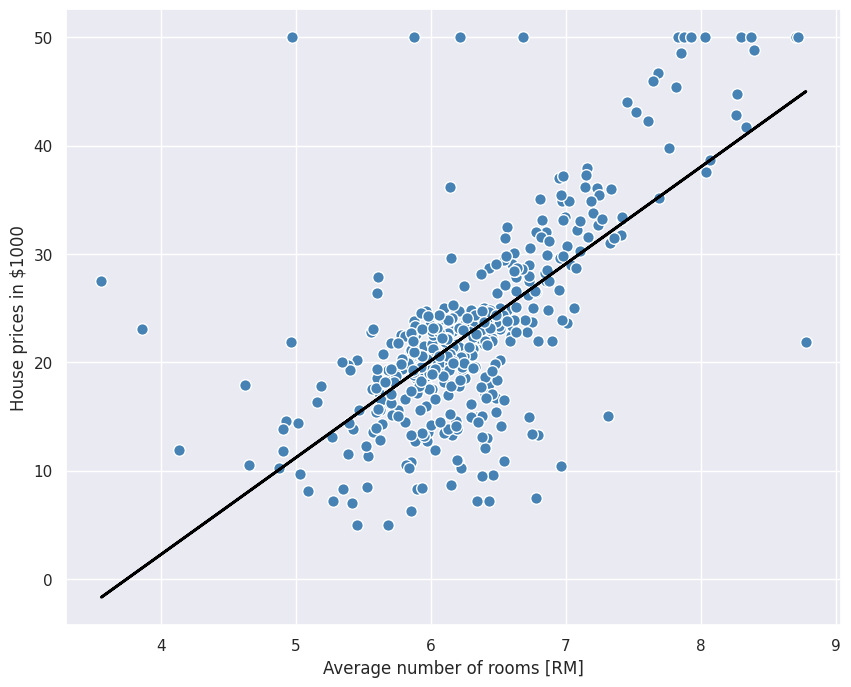

In [110]:
lin_regplot(X_train, y_train, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('House prices in $1000')
plt.show()

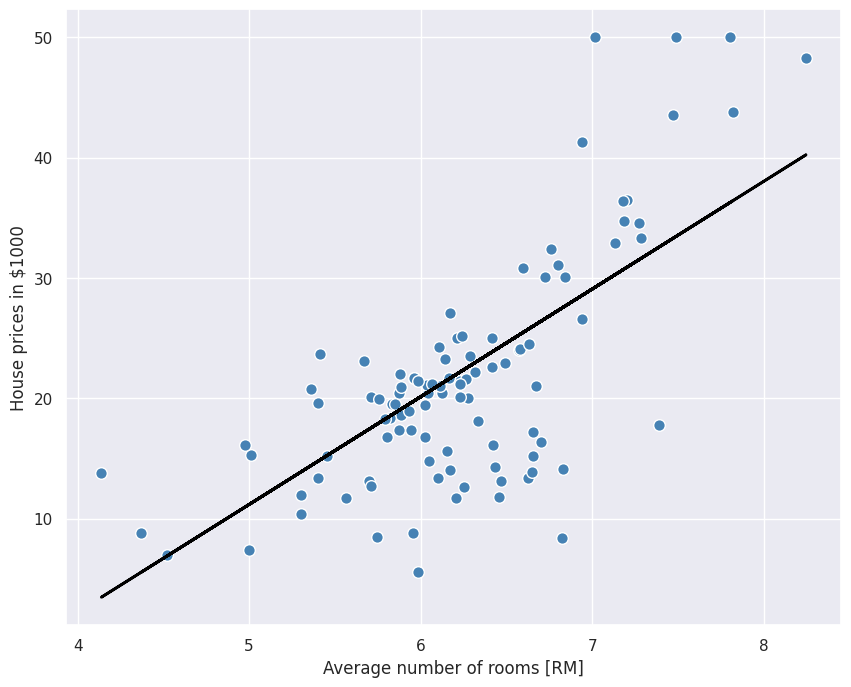

In [111]:
lin_regplot(X_test, y_test, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('House prices in $1000')
plt.show()

## 모델 평가

In [112]:
from sklearn.metrics import mean_squared_error

rmse = (np.sqrt(mean_squared_error(y_train,y_pred_t)))
print('RMSE :' , rmse)

RMSE : 6.558400914980574


In [113]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print('RMSE :' , rmse)

RMSE : 6.7881975443771765


## 전체 특성 사용



In [118]:
X = df.drop('PRICE',axis=1)
y= df['PRICE']

y_pred_t = slr.predict(X_train)
y_pred = slr.predict(X_test)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,
                                                 random_state = 13)

slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [119]:
rmse = (np.sqrt(mean_squared_error(y_train,y_pred_t)))
print('RMSE :' , rmse)

RMSE : 4.642806069019823


In [120]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print('RMSE :' , rmse)

RMSE : 4.931352584146701


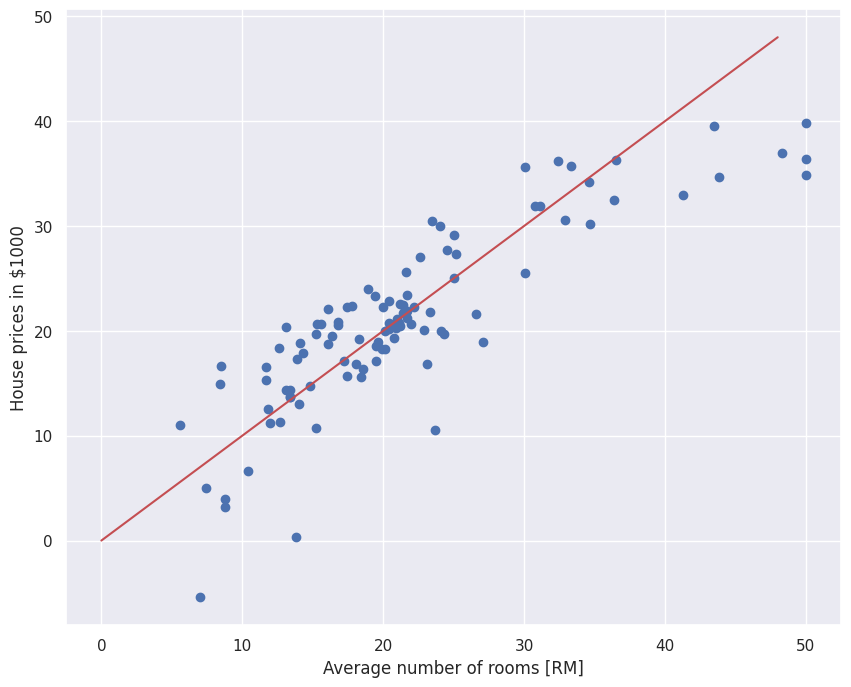

In [122]:
plt.scatter(y_test,y_pred)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('House prices in $1000')
plt.plot([0,48],[0,48],'r')